# U.S. Medical Insurance Costs

## Introduction

<b>Codeacademy Data Scientist Career Path: Portfolio Project 1</b>

This notebook is designed to outline a basic exploratory analysis of data. The data used here is a playground dataset of U.S. Medical Insurance Costs provided by Codeacademy. The data is used in a pedagogical way to explore the possibile applications of using data in the real world.

We will make use of fundamental Python programming practice and walkthrough the process step by step.

<div class="alert alert-success">
    
<h3>Project plan</h3>

<p>Before we start we need to outline what business goals we want to achieve from this data. Below is a list of potential goals.

<ul>
    <li><b>Global analysis</b><br> 
        Global averages and trends can be useful for exploring the overall mean insurance costs predicted from the underlying calculation.
    </li>
    <br>
    <li><b>Largest contributions</b><br>
        Knowing the largest contributions can help companies explore how the insurance costs are affected by different factors.
    </li>
    <br>
    <li><b>Recommendations for the user</b><br> 
        Users can get personalised advice on how to decrease their insurance premium in the most effective ways.
    </li>
    <br>
    <li><b>Regional analysis</b><br>
        Knowing the general trends based on the region can give the company insights into what offers to promote in different areas or how to recalculate the insurance prices based on how people differ in these regions.
    </li>
</ul>

We will work down this list and explore the possible applications of the results.
</p>

</div>

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## The Dataset

In [17]:
data = pd.read_csv("insurance.csv")
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Now we have some idea of how our data looks, we can perform some initial analysis to get some overall insights.

First we can find the size of our dataset...

In [18]:
print("Shape of our data is (# of rows, # of columns): ", data.shape)

Shape of our data is (# of rows, # of columns):  (1338, 7)


We therefore see that we have 1338 entries for 1338 different customers across the US. We also see that we have 7 features for each of these customers to base our analysis on.

### Transforming the data

From the preview of the data above, we can see that there exists some data in a somewhat difficult to use format. Or as far as a computer is concerned anyway!

Therefore in this section we will transform the columns in our data to a more usuable format.

When a computer is reading in categorical variables, it is much easier to encode these categories numerically. For a simple case of having two categories we can essentially just transform the feature already present to be 1 or 0 (True/False). We shall show this below using the smoker column.

In [19]:
print(f"In the smoker column we have {data.smoker.nunique()} unique category's (yes/no)")

In the smoker column we have 2 unique category's (yes/no)


In [20]:
data["smoker"] = data["smoker"].apply(lambda x: 1 if x=="yes" else 0)
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,1,southwest,16884.92400
1,18,male,33.770,1,0,southeast,1725.55230
2,28,male,33.000,3,0,southeast,4449.46200
3,33,male,22.705,0,0,northwest,21984.47061
4,32,male,28.880,0,0,northwest,3866.85520


Here we can see that the smoker feature has been transformed into a much more computer friendly format.

For categories which are not as simple as True/False, we can use a technique called one-hot encoding. This technique includes creating some sub-columns/sub-features for each potential category allowed by the overall feature.

To show how this works, we will consider the "sex" feature.

Note: It is true that this is a 2 category feature, however we must choose whether male or female corresponds to our "True/False" encoding, so to preseve gender equality, we will give each sex its own feature. This also means we can accomodate any number of gender preferences the customer wishes to identify as. Always good to be mindful of these issues everywhere we can be!

In [21]:
from sklearn.preprocessing import OneHotEncoder

one_hot = OneHotEncoder(categories="auto")

data_sex = data[["sex"]]
data_sex_1hot = one_hot.fit_transform(data_sex)
data_sex_1hot_df = pd.DataFrame(data_sex_1hot.toarray(), columns=one_hot.get_feature_names(["sex"]))

transform_data = data.join(data_sex_1hot_df)
transform_data = transform_data.drop(["sex"], axis=1)
transform_data.head()

,age,bmi,children,smoker,region,charges,sex_female,sex_male
0,19,27.900,0,1,southwest,16884.92400,1.0,0.0
1,18,33.770,1,0,southeast,1725.55230,0.0,1.0
2,28,33.000,3,0,southeast,4449.46200,0.0,1.0
3,33,22.705,0,0,northwest,21984.47061,0.0,1.0
4,32,28.880,0,0,northwest,3866.85520,0.0,1.0


Finally (for now), we can also do this for the children category...

In [22]:
data_child = transform_data[["children"]]
data_child_1hot = one_hot.fit_transform(data_child)
data_child_1hot_df = pd.DataFrame(data_child_1hot.toarray(), columns=one_hot.get_feature_names(["children"]))

transform_data = transform_data.join(data_child_1hot_df)
transform_data = transform_data.drop(["children"], axis=1)
transform_data.head()

,age,bmi,smoker,region,charges,sex_female,sex_male,children_0,children_1,children_2,children_3,children_4,children_5
0,19,27.900,1,southwest,16884.92400,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,18,33.770,0,southeast,1725.55230,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
2,28,33.000,0,southeast,4449.46200,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,33,22.705,0,northwest,21984.47061,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
4,32,28.880,0,northwest,3866.85520,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0


## National Analysis

As stated in the outline of this project, we can get an idea of the national picture of insurance costs by considering all the data.

The simplest analysis we can do is find the national averages for customers in our dataset.

In [35]:
average_values = transform_data.mean()
print(f"Average values for numerical features in dataset: \n{average_values}")

Average values for numerical features in dataset: 
age              39.207025
bmi              30.663397
smoker            0.204783
charges       13270.422265
sex_female        0.494768
sex_male          0.505232
children_0        0.428999
children_1        0.242152
children_2        0.179372
children_3        0.117339
children_4        0.018685
children_5        0.013453
dtype: float64


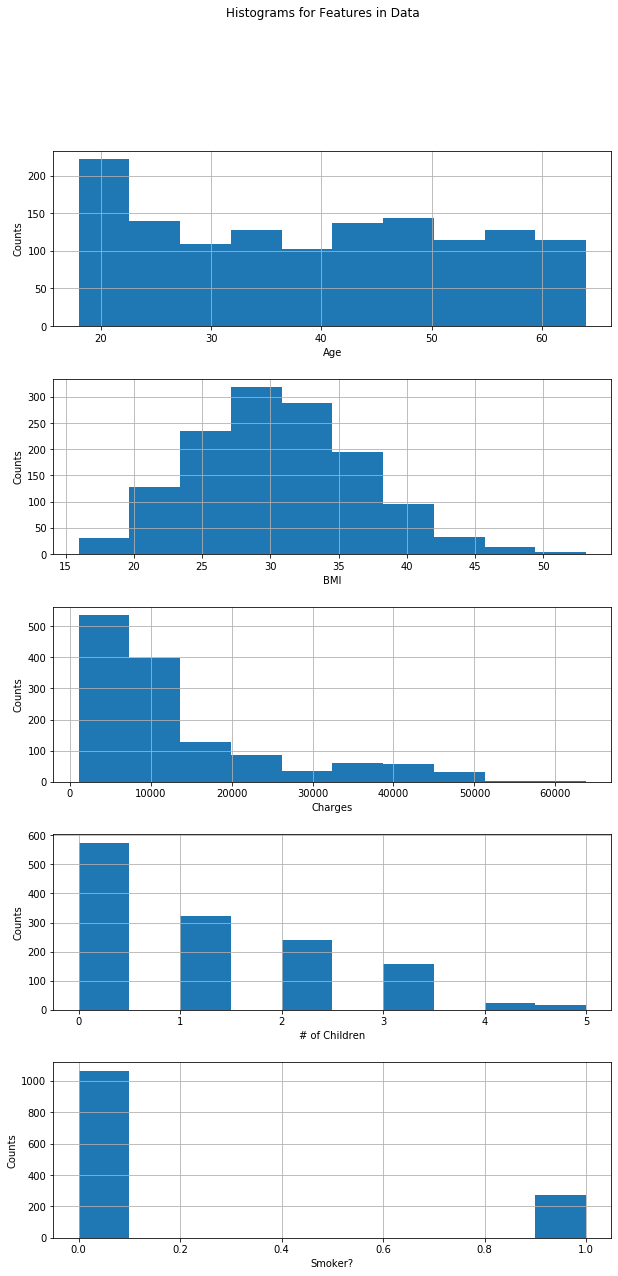

In [36]:
columns = ["Age", "BMI", "Charges", "# of Children", "Smoker?"]

fig, axes = plt.subplots(5, figsize=(10, 20))
data.hist(ax=axes)
for n, ax in enumerate(axes.ravel()):
    ax.set_ylabel("Counts")
    ax.set_xlabel(columns[n])
    ax.set_title("")
fig.suptitle("Histograms for Features in Data")
plt.show()

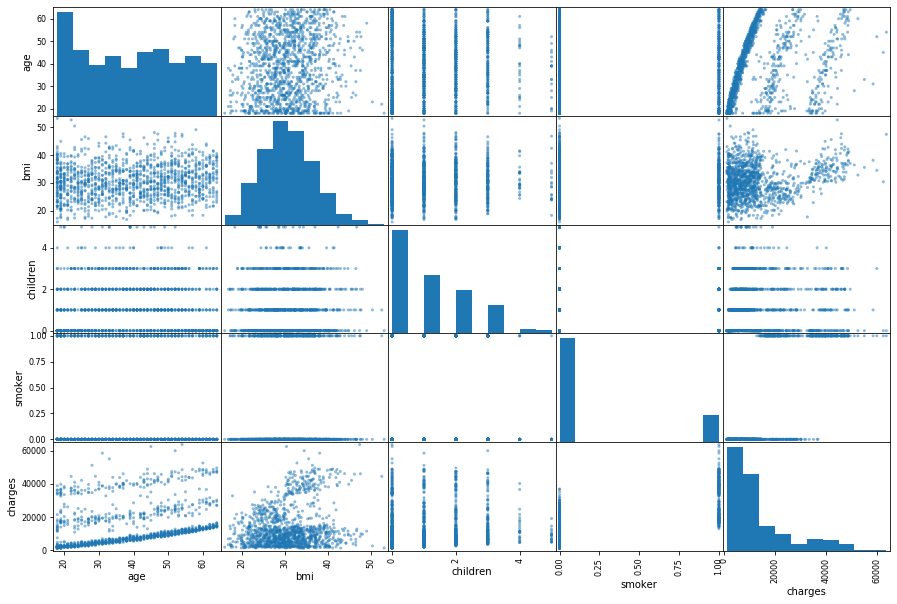

In [37]:
from pandas.plotting import scatter_matrix

scatter_matrix(data, figsize=(15, 10))
plt.show()